<a href="https://colab.research.google.com/github/AlphaUser2025/Task-/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ----------------- 1. Import Libraries -----------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Removed the code from the previous cell and will add new cells to calculate seats_sold and prepare data for modeling.

In [ ]:
# Calculate seats_sold by counting unique seat_number for each ride_id
seats_sold_df = df.groupby('ride_id')['seat_number'].nunique().reset_index()
seats_sold_df.rename(columns={'seat_number': 'seats_sold'}, inplace=True)

# Merge seats_sold back to the original dataframe
df = pd.merge(df, seats_sold_df, on='ride_id', how='left')

# Drop duplicates based on ride_id to have one row per ride with the total seats sold
df = df.drop_duplicates(subset=['ride_id']).reset_index(drop=True)

print(df.head())
print(df.columns)

   ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO    17-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE    19-11-17        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O    26-11-17        7:05   
3     5777         19A          Mpesa      SGP18CL0ME    27-11-17        7:10   
4     5778         11A          Mpesa      BM97HFRGL9    27-11-17        7:12   

  travel_from travel_to car_type  max_capacity  seats_sold  
0      Migori   Nairobi      Bus            49           1  
1      Migori   Nairobi      Bus            49           1  
2      Keroka   Nairobi      Bus            49           1  
3    Homa Bay   Nairobi      Bus            49           5  
4      Migori   Nairobi      Bus            49          30  
Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',


SEATS SOLD OVER MONTHS

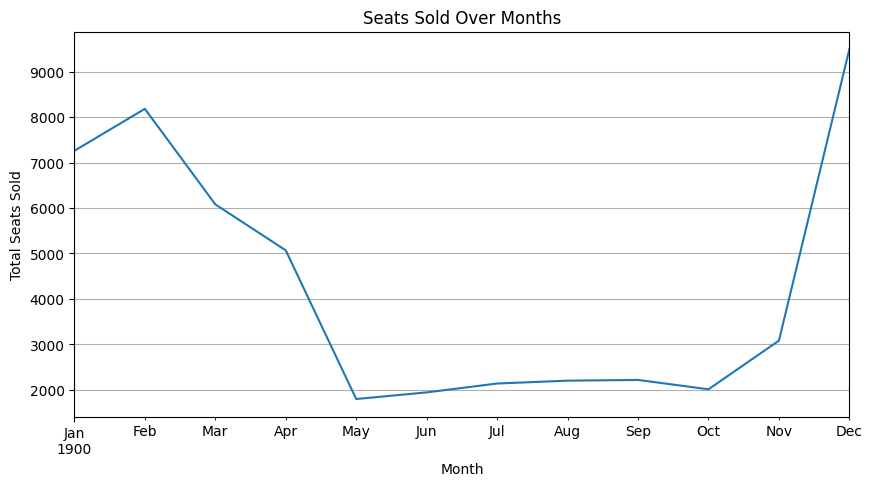

In [ ]:
if 'month' in df.columns:
    df_plot = df.copy()
    df_plot['month'] = pd.to_datetime(df_plot['month'], format='%m', errors='coerce')
    df_plot.groupby('month')['seats_sold'].sum().plot(figsize=(10,5), title="Seats Sold Over Months")
    plt.xlabel("Month")
    plt.ylabel("Total Seats Sold")
    plt.grid(True)
    plt.show()

SEATS SOLD BY DAY OF WEAK

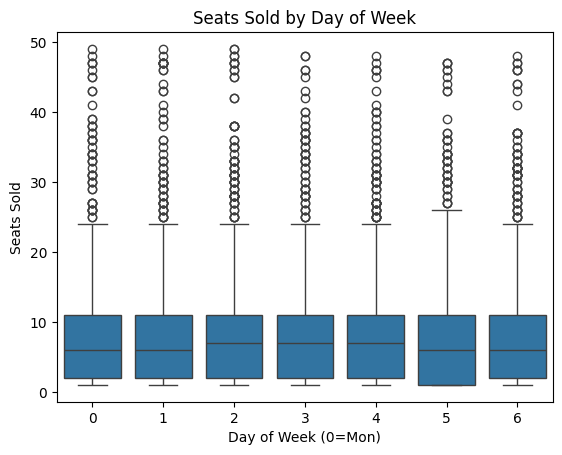

In [ ]:
if 'day_of_week' in df.columns:
    sns.boxplot(x='day_of_week', y='seats_sold', data=df)
    plt.title("Seats Sold by Day of Week")
    plt.xlabel("Day of Week (0=Mon)")
    plt.ylabel("Seats Sold")
    plt.show()

In [ ]:
if 'origin' in df.columns:
    plt.figure(figsize=(12,6))
    sns.barplot(x='origin', y='seats_sold', data=df, estimator=np.mean)
    plt.xticks(rotation=45)
    plt.title("Avg Seats Sold per Origin")
    plt.show()

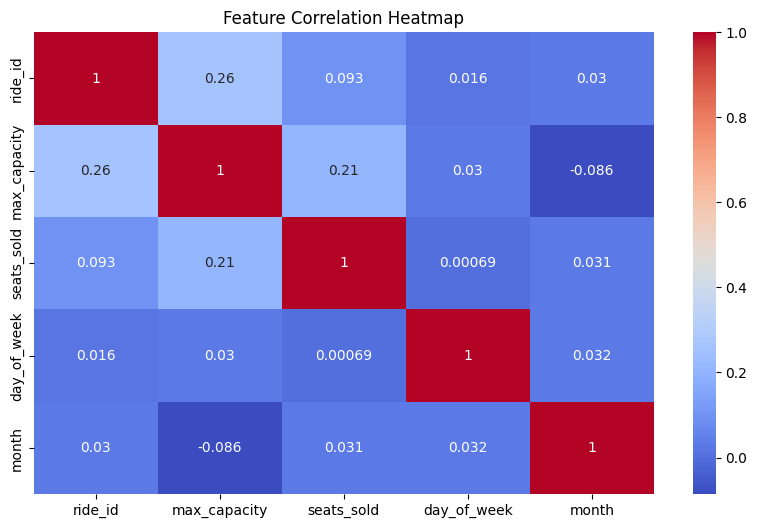

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Linear Regression
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['max_capacity']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['travel_time', 'travel_from',
                                                   'travel_to',
                                                   'car_type'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("R² Score:", round(r2_score(y_true, y_pred), 3))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 3))

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Performance:
R² Score: 0.485
RMSE: 6.681

Random Forest Performance:
R² Score: 0.589
RMSE: 5.965


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

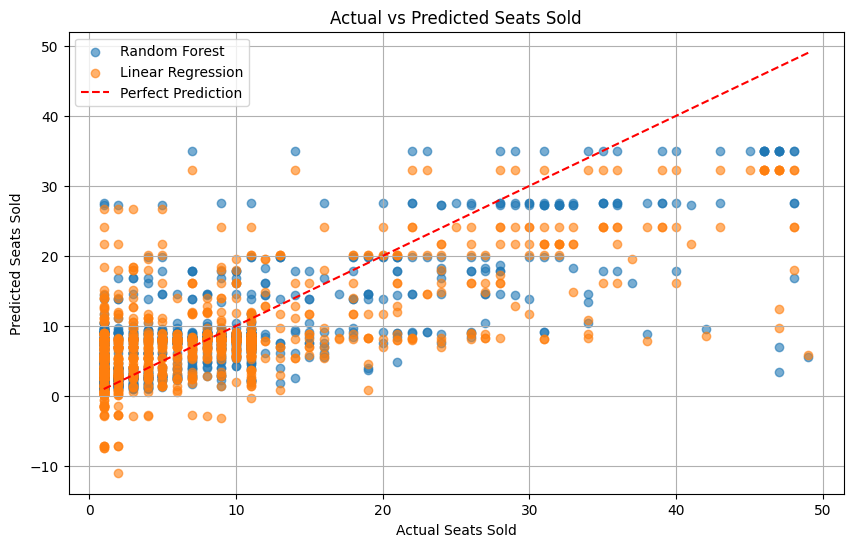

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest")
plt.scatter(y_test, y_pred_lr, alpha=0.6, label="Linear Regression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Seats Sold")
plt.ylabel("Predicted Seats Sold")
plt.legend()
plt.title("Actual vs Predicted Seats Sold")
plt.grid(True)
plt